<h2><center>Исследование данных</center></h2>

У нас уже есть ряд инструментов для лингвистического исследования данных:

- для [морфологического анализа](https://github.com/hse-ling-python/seminars/blob/master/morphology/morphology_1.ipynb)
- для [синтаксического анализа](https://github.com/hse-ling-python/seminars/blob/master/UDPipe/syntax.md)
- для семантического анализа ([word2vec](https://github.com/hse-ling-python/seminars/blob/master/vector_models/vector_models_20-21.ipynb), [tfidf](https://nbviewer.jupyter.org/github/hse-ling-python/seminars/blob/master/text_to_vector/TF-IDF.ipynb))
- для визуализации ([графики](https://github.com/hse-ling-python/seminars/blob/master/visualization/visualization_1.ipynb), [графы](https://github.com/hse-ling-python/seminars/blob/master/graphs/graphs.ipynb))

Мы можем токенизировать, лемматизировать, провести частеречную разметку, выделить синтаксические составляющие, выделить синт. зависимые и синт. вершины, выделить синт. отношения, выделить n-граммы, определить семантическую близость с помощью word2vec, определить ключевые слова с помощью tfidf.

Если мы вводим социолингвистическую информацию (возраст, пол, профессию, уровень образования и т.п.), полезно иметь в виду уровни изучения вариативности. Можно соотносить лингвистические черты и макропараметры типа возраста, пола, социально-экономического класса и т.п. Например, можно посмотреть, как длина поста VK коррелирует с гендером.

In [ ]:
df = pd.DataFrame(SQL_Query, columns=['gender', 'b_date', 'text', 'lem_text'])
texts = df['text'].tolist()
lem_texts = df['lem_text'].tolist()
lengths = [len(text.split()) for text in texts]
lem_lengths = [len(text.split()) for text in lem_texts]
df['text_length'] = lengths
df['lem_length'] = lem_lengths
df

,gender,b_date,text,lem_text,text_length,lem_length
0,male,21.2,permanently relevant to everything,permanently relevant everything,4,3
1,male,21.2,наелся и ушел ботать,наесться уйти ботать,4,3
2,male,21.2,so that's what it feels like,'s feels like,6,3
3,male,21.2,"it's not that bad, you guys!",'s bad guys,6,3
4,male,21.2,bless them ❤ 🐈\n\nhttps://youtu.be/W86cTIoMv2U,bless ❤ 🐈 //youtu.be/w86ctiomv2u,5,4
...,...,...,...,...,...,...
4199,female,15.2,господа а кто может посоветовать чего-нибудь в...,господин мочь посоветовать что-нибудь дух пост...,14,9
4200,female,15.2,ВНИМАНИЕ ВСЕМ ПОСТАМ СРОЧНОЕ ОБЪЯВЛЕНИЕ\n\nкак...,внимание пост срочный объявление топовый песня,9,6
4201,female,15.2,июль-август 2017 LET'S GOOOO\n\nможете меня по...,июль-август 2017 let 's goooo мочь поздравить ...,65,39
4202,female,15.2,my ears have been blessed,ears blessed,5,2


Text(0.5, 0, 'gender')

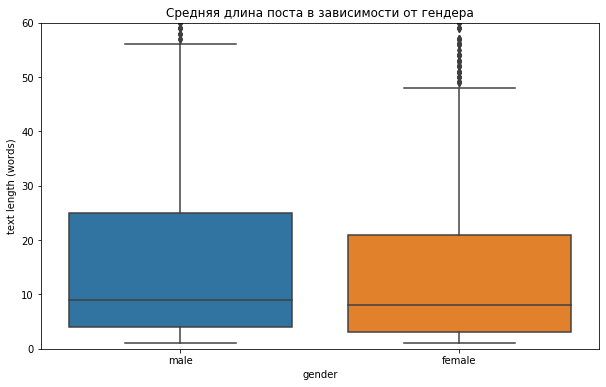

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="text_length", data=df)
plt.ylim((0, 60))
plt.title('Средняя длина поста в зависимости от гендера')
plt.ylabel('text length (words)')
plt.xlabel('gender')

Text(0.5, 0, 'gender')

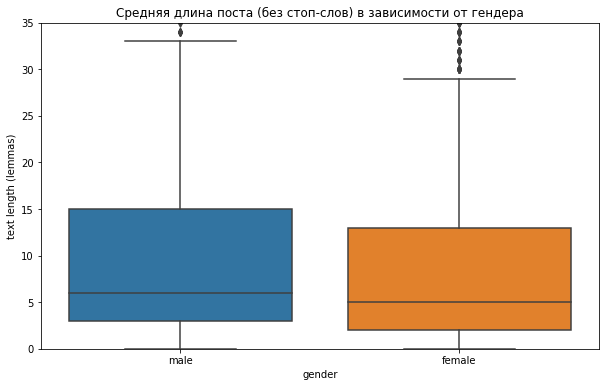

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="lem_length", data=df)
plt.ylim((0, 35))
plt.title('Средняя длина поста (без стоп-слов) в зависимости от гендера')
plt.ylabel('text length (lemmas)')
plt.xlabel('gender')

Можно формулировать гипотезы для конкретных сообществ и категорий, релевантных для них. Например, можно взять две группы VK и сравнить, как в них соотносятся какие-то конкретные синтаксические конструкции. Если различия есть, попробовать объяснить, почему они могут существовать для данных групп VK. 

Можно формулировать гипотезы и про индивидуальную вариативность: исследовать, как морф., синт. или сем. параметры варьируют в речи конкретного человека или людей.

### Практика

[С использованием материалов Э.С. Клышинского](https://github.com/klyshinsky/ML_masters_2020/blob/master/Lecture_20201013_text_processing.ipynb)

Поиграем с [файлом с новостями](https://github.com/klyshinsky/ML_masters_2020/blob/master/data/lenta2018_summer2.txt) с сайта http://lenta.ru/. Все новости отделены друг от друга пятью знаками равно, дальше идет дата новости, пять минусов, текст новости.

Начнем с того, что загрузим новости в DataFrame.

In [ ]:
import re
from tqdm import tqdm
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
with open("/content/lenta", encoding="utf-8") as newsfile:
    text_news = [(n.split("-----\n")[0].split('\n')[0], 
                  n.split("-----\n")[0].split('\n')[1], 
                  n.split("-----\n")[1]) for n in newsfile.read().split("=====\n")[1:]]
    news = pd.DataFrame(text_news, columns = ['Header', 'Date', 'News'])

In [ ]:
!head /content/lenta


=====
«Королева дерьмовых роботов» перенесла операцию на мозге
2018/06/01
-----
Шведская YouTube-знаменитость Симона Герц (Simone Giertz), прославившаяся необычными изобретениями, перенесла операцию. Об этом рассказали ее представители в Twitter. Еще в конце апреля девушка сообщила подписчикам о недуге. Оказалось, что у нее в мозге обнаружили доброкачественную опухоль размером с мяч для гольфа. Блогер даже дала ей имя, назвав новообразование Брайаном.  Герц сильно переживала перед хирургическим вмешательством. В одном из предоперационных видео она говорила, что очень напугана. Однако врачи быстро удалили опухоль и спасли девушке жизнь. «Симона вышла из хирургии, и ее врачи очень довольны тем, как все прошло. Она проспала достаточно долго, чтобы сделать неуместную шутку, так что все хорошо», — говорится на ее странице в Twitter.  27-летняя изобретательница из Стокгольма прославилась несколько лет назад, показывая подписчикам свои бесполезные изобретения. Например, Герц демонстрировала 

In [ ]:
news.head()

,Header,Date,News
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...


Посмотрим, какие слова чаще всего встречаются в новостях. 

Разделим текст на слова простейшим образом, с помощью регулярных выражений: будем считать, что слово - это много русских или латинских букв.

In [ ]:
words = re.findall('[A-Za-zА-ЯЁа-яё]+-[A-Za-zА-ЯЁа-яё]+|[A-Za-zА-ЯЁа-яё]+', news.News.iloc[0])
words

['Шведская',
 'YouTube-знаменитость',
 'Симона',
 'Герц',
 'Simone',
 'Giertz',
 'прославившаяся',
 'необычными',
 'изобретениями',
 'перенесла',
 'операцию',
 'Об',
 'этом',
 'рассказали',
 'ее',
 'представители',
 'в',
 'Twitter',
 'Еще',
 'в',
 'конце',
 'апреля',
 'девушка',
 'сообщила',
 'подписчикам',
 'о',
 'недуге',
 'Оказалось',
 'что',
 'у',
 'нее',
 'в',
 'мозге',
 'обнаружили',
 'доброкачественную',
 'опухоль',
 'размером',
 'с',
 'мяч',
 'для',
 'гольфа',
 'Блогер',
 'даже',
 'дала',
 'ей',
 'имя',
 'назвав',
 'новообразование',
 'Брайаном',
 'Герц',
 'сильно',
 'переживала',
 'перед',
 'хирургическим',
 'вмешательством',
 'В',
 'одном',
 'из',
 'предоперационных',
 'видео',
 'она',
 'говорила',
 'что',
 'очень',
 'напугана',
 'Однако',
 'врачи',
 'быстро',
 'удалили',
 'опухоль',
 'и',
 'спасли',
 'девушке',
 'жизнь',
 'Симона',
 'вышла',
 'из',
 'хирургии',
 'и',
 'ее',
 'врачи',
 'очень',
 'довольны',
 'тем',
 'как',
 'все',
 'прошло',
 'Она',
 'проспала',
 'достаточно'

Посчитаем частотность слов при помощи Counter.

In [ ]:
from collections import Counter 

wdict = Counter(words) 
print(wdict)
print({w:n for w,n in wdict.items() if n>1})

Counter({'в': 5, 'Герц': 4, 'ее': 4, 'что': 3, 'из': 3, 'Симона': 2, 'Twitter': 2, 'девушка': 2, 'подписчикам': 2, 'опухоль': 2, 'с': 2, 'для': 2, 'очень': 2, 'врачи': 2, 'и': 2, 'все': 2, 'на': 2, 'Шведская': 1, 'YouTube-знаменитость': 1, 'Simone': 1, 'Giertz': 1, 'прославившаяся': 1, 'необычными': 1, 'изобретениями': 1, 'перенесла': 1, 'операцию': 1, 'Об': 1, 'этом': 1, 'рассказали': 1, 'представители': 1, 'Еще': 1, 'конце': 1, 'апреля': 1, 'сообщила': 1, 'о': 1, 'недуге': 1, 'Оказалось': 1, 'у': 1, 'нее': 1, 'мозге': 1, 'обнаружили': 1, 'доброкачественную': 1, 'размером': 1, 'мяч': 1, 'гольфа': 1, 'Блогер': 1, 'даже': 1, 'дала': 1, 'ей': 1, 'имя': 1, 'назвав': 1, 'новообразование': 1, 'Брайаном': 1, 'сильно': 1, 'переживала': 1, 'перед': 1, 'хирургическим': 1, 'вмешательством': 1, 'В': 1, 'одном': 1, 'предоперационных': 1, 'видео': 1, 'она': 1, 'говорила': 1, 'напугана': 1, 'Однако': 1, 'быстро': 1, 'удалили': 1, 'спасли': 1, 'девушке': 1, 'жизнь': 1, 'вышла': 1, 'хирургии': 1, 'дов

Фактически, выше мы провели преобразование текста в вектор. Пространство вектора определено на словаре текста - количество измерений совпадает с количеством слов, каждому измерению сопоставлено какое-то слово и отложена его частота. Подобный подход называют мешком слов (Bag of Words, BoW), так как все слова перемешиваются, их порядок больше не соблюдается, а сами слова сваливаются в один "мешок".

Обратите внимание на распределение частот в отдельных словах и парах. Такое распределение называется [распределением Ципфа](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A6%D0%B8%D0%BF%D1%84%D0%B0) и является характерным практически для любого распределения частот слов и их комбинаций в текстах на любом естественном языке.

Для расчета частот существует CountVectorizer:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
counter = CountVectorizer()
# Просим посчитать частоты слов.
res = counter.fit_transform([news.News.iloc[0]])
# Разреженное представление счетчика.
print(res[0,:10]) # По идентификатору можно получить частоту слова.
# Можно получить индекс по слову, ...
print('герц', counter.vocabulary_.get('герц'))
# ... но не наоборот.
print(counter.vocabulary_.get(18))
print(counter.vocabulary_) # Словарь, который сопоставляет слову его идентификатор.

  (0, 4)	1
  (0, 2)	1
  (0, 1)	1
  (0, 3)	2
  (0, 6)	1
  (0, 8)	1
  (0, 0)	1
  (0, 7)	1
  (0, 5)	1
  (0, 9)	1
герц 18
None
{'шведская': 123, 'youtube': 4, 'знаменитость': 37, 'симона': 104, 'герц': 18, 'simone': 2, 'giertz': 1, 'прославившаяся': 89, 'необычными': 66, 'изобретениями': 42, 'перенесла': 81, 'операцию': 76, 'об': 70, 'этом': 125, 'рассказали': 94, 'ее': 33, 'представители': 87, 'twitter': 3, 'еще': 35, 'конце': 46, 'апреля': 6, 'девушка': 24, 'сообщила': 106, 'подписчикам': 83, 'недуге': 64, 'оказалось': 74, 'что': 121, 'нее': 65, 'мозге': 54, 'обнаружили': 71, 'доброкачественную': 29, 'опухоль': 77, 'размером': 93, 'мяч': 56, 'для': 28, 'гольфа': 21, 'блогер': 8, 'даже': 22, 'дала': 23, 'ей': 34, 'имя': 43, 'назвав': 59, 'новообразование': 69, 'брайаном': 10, 'сильно': 103, 'переживала': 80, 'перед': 79, 'хирургическим': 117, 'вмешательством': 14, 'одном': 73, 'из': 38, 'предоперационных': 86, 'видео': 13, 'она': 75, 'говорила': 19, 'очень': 78, 'напугана': 63, 'однако': 

На вход классу подается список текстов. Результатом работы является [разреженная матрица](https://docs.scipy.org/doc/scipy/reference/sparse.html) частот слов. Если мы возьмем большое количество текстов, то в каждом из них встречается не так много разных слов, но словарь всех текстов вместе будет огромен. Обработка текстов должна вестись в едином пространстве. Пусть это будет пространство словаря всех текстов. Получается, что для текста с маленьким словарем мы должны хранить большое число нулей. Для того, чтобы этого избежать, хранят, например, один раз номер строки, индексы ненулевых значений и сами значения, то есть чуть больше двух чисел на ненулевое значение. Если считать, что словарь одного текста - 100 слов, а словарь всех текстов - 100 000 слов, мы получаем экономию места в 500 раз.

[Иллюстрация BOW](https://livebook.manning.com/book/natural-language-processing-in-action/chapter-4/v-4/61)

Обратите внимание, что все слова приведены к маленьким буквам, но про слова с дефисом этот класс ничего не знает.

Чтобы исправить эту ситуацию можно передать собственное регулярное выражение для разделения на слова.

In [ ]:
counter=CountVectorizer(token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
# Обратите внимание, передается список текстов.
res=counter.fit_transform([news.News.iloc[0]])
print(counter.vocabulary_) 

{'шведская': 127, 'youtube-знаменитость': 3, 'симона': 107, 'герц': 18, 'simone': 1, 'giertz': 0, 'прославившаяся': 91, 'необычными': 67, 'изобретениями': 42, 'перенесла': 83, 'операцию': 78, 'об': 72, 'этом': 129, 'рассказали': 96, 'ее': 33, 'представители': 89, 'в': 12, 'twitter': 2, 'еще': 35, 'конце': 47, 'апреля': 5, 'девушка': 24, 'сообщила': 109, 'подписчикам': 85, 'о': 71, 'недуге': 65, 'оказалось': 76, 'что': 125, 'у': 118, 'нее': 66, 'мозге': 55, 'обнаружили': 73, 'доброкачественную': 29, 'опухоль': 79, 'размером': 95, 'с': 100, 'мяч': 57, 'для': 28, 'гольфа': 21, 'блогер': 7, 'даже': 22, 'дала': 23, 'ей': 34, 'имя': 43, 'назвав': 60, 'новообразование': 70, 'брайаном': 9, 'сильно': 106, 'переживала': 82, 'перед': 81, 'хирургическим': 121, 'вмешательством': 14, 'одном': 75, 'из': 38, 'предоперационных': 88, 'видео': 13, 'она': 77, 'говорила': 19, 'очень': 80, 'напугана': 64, 'однако': 74, 'врачи': 15, 'быстро': 11, 'удалили': 119, 'и': 37, 'спасли': 110, 'девушке': 25, 'жизнь'

Помимо этого, CountVectorizer умеет выделять n-граммы:

In [ ]:
# ngram_range - это кортеж, который указывает длины последовательсностей, которые надо выделить. 
# Обязательны оба значения. Если хочется извлечь 4-граммы, надо передать (4,4).
counter=CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
res=counter.fit_transform([news.News.iloc[0]])
print(counter.vocabulary_)

{'шведская': 279, 'youtube-знаменитость': 7, 'симона': 236, 'герц': 43, 'simone': 2, 'giertz': 0, 'прославившаяся': 203, 'необычными': 152, 'изобретениями': 102, 'перенесла': 187, 'операцию': 175, 'об': 162, 'этом': 283, 'рассказали': 213, 'ее': 78, 'представители': 199, 'в': 25, 'twitter': 4, 'еще': 85, 'конце': 112, 'апреля': 11, 'девушка': 58, 'сообщила': 241, 'подписчикам': 191, 'о': 160, 'недуге': 148, 'оказалось': 170, 'что': 273, 'у': 259, 'нее': 150, 'мозге': 128, 'обнаружили': 164, 'доброкачественную': 70, 'опухоль': 177, 'размером': 211, 'с': 221, 'мяч': 132, 'для': 67, 'гольфа': 52, 'блогер': 15, 'даже': 54, 'дала': 56, 'ей': 83, 'имя': 104, 'назвав': 138, 'новообразование': 158, 'брайаном': 19, 'сильно': 234, 'переживала': 185, 'перед': 183, 'хирургическим': 265, 'вмешательством': 33, 'одном': 168, 'из': 92, 'предоперационных': 197, 'видео': 31, 'она': 172, 'говорила': 48, 'очень': 180, 'напугана': 146, 'однако': 166, 'врачи': 35, 'быстро': 23, 'удалили': 261, 'и': 89, 'спа

Выделим пять самых частотных слов или словосочетаний из текста новости. Воспользуемся тем фактом, что CountVectorizer умеет работать со списками новостей.

In [ ]:
def getMostFrequentWords(text):
    counter=CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
    res=counter.fit_transform([text])
    frq = sorted([(i, int(res[0][0,i])) for i in range(res[0].shape[1])], key = lambda x: x[1], reverse = True)[:5]
    vocab = {w:res[0,i] for w,i in counter.vocabulary_.items()}
    return [[w for w, n in counter.vocabulary_.items() if n==i][0] for i, f in frq], vocab
    

In [ ]:
   
freqwords = []
vocabs = []
for i in tqdm(range(news.shape[0])):
    fw, v = getMostFrequentWords(news.News.iloc[i])
    freqwords.append(fw)
    vocabs.append(v)
    
news['Vocabular'] = vocabs
news['Freq Words'] = freqwords

100%|██████████| 7816/7816 [05:09<00:00, 25.23it/s]


In [ ]:
news.head()

,Header,Date,News,Vocabular,Freq Words
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...,"{'шведская': 1, 'youtube-знаменитость': 1, 'си...","[в, герц, ее, из, что]"
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...,"{'перспективный': 1, 'российский': 1, 'многофу...","[су, в, не, на, ни]"
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...,"{'санкт-петербургский': 1, 'клуб': 2, 'контине...","[и, в, знарок, ска, тренера]"
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...,"{'следственный': 1, 'комитет': 1, 'по': 3, 'мо...","[в, его, и, к, по]"
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...,"{'более': 1, 'жителей': 1, 'киева': 2, 'перекр...","[в, на, автомобиль, в котором, дтп]"


Подключим морфологический анализ, чтобы избавиться от стоп-слов и привести формы слова к лемме. Начнем с Pymorphy.

In [ ]:
import pymorphy2

In [ ]:
morph=pymorphy2.MorphAnalyzer() # Создает объект морфоанализатора и загружет словарь.
wordform=morph.parse('стекло')  # Проведем анализ слова "стекло"...
print(wordform)                 # ... и посмотрим на результат.

[Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='стекло', score=0.690476, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 0),)), Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='стекло', score=0.285714, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 3),)), Parse(word='стекло', tag=OpencorporaTag('VERB,perf,intr neut,sing,past,indc'), normal_form='стечь', score=0.023809, methods_stack=((DictionaryAnalyzer(), 'стекло', 1015, 3),))]


In [ ]:
wordform=morph.parse('ёрничали') 
wordform

[Parse(word='ёрничали', tag=OpencorporaTag('VERB,impf,intr plur,past,indc'), normal_form='ёрничать', score=1.0, methods_stack=((DictionaryAnalyzer(), 'ёрничали', 15, 10),))]

In [ ]:
wordform[0].score

1.0

In [ ]:
wordform[0].tag

OpencorporaTag('VERB,impf,intr plur,past,indc')

Самым простым видом борьбы с омонимией является выбор нулевого элемента из списка, возвращенного морфологическим анализом. Такой подход дает около 90% точности при выборе начальной формы и до 80% если мы обращаем внимание на грамматические параметры.<br><br>
Вместо Pymorphy можно использовать PyMystem. Его плюсом является тот факт, что он сам снимает омонимию. Используя функцию lemmatize можно получить набор начальных форм слов. Используя функцию analyze можно получить полную информацию о словах.

In [ ]:
import pymystem3 # Еще один морфологический анализатор. При первом запуске грузит словари из Сети.

In [ ]:
mystem=pymystem3.Mystem()
print(mystem.lemmatize('эти типы стали есть в цеху.'))
print(mystem.analyze('эти типы стали есть в цеху.'))

In [ ]:
my_res=mystem.analyze('эти типы стали есть в цеху.')
if 'analysis' in my_res[0].keys():
    print(my_res[0]['analysis'][0]['gr'].split("=")[0])

APRO


Функция `lemmatize` делит текст на слова и знаки препинания, а затем возвращает для них только начальную форму.

Функция `analyze` возвращает не только начальную форму, но и всю информацию о слове, как это делал перед этим Pymorphy. 

Основным отличием является то, что Mystem снимает омонимию. Как видно из примера, делает он это не всегда корректно, но нам не придется думать о том, какой вариант разбора следует взять.

Еще одна библиотека - NLTK. По сравнению с двумя предыдущими библиотеками она обладает более широкой функциональностью и изначально писалась для работы с разными языками.

In [ ]:
import nltk

Перед началом использования необходимо загрузить необходимые библиотеки или корпуса.

In [ ]:
nltk.download() # По дороге будут появляться поле ввода. Грузит всё из Сети.

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

True

Можно сразу скачать нужный пакет, если вы знаете, как он назыввается.

In [ ]:
nltk.download(['averaged_perceptron_tagger_ru', 'stopwords'])

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Функция `word_tokenize` возвращает начальные формы слов. 

Функция `pos_tag` возвращает список начальных форм и их частей речи.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tokens = nltk.word_tokenize('Эти типы стали есть в цеху') # Токенизация.
bi_tokens = list(nltk.bigrams(tokens))
tokens, bi_tokens

(['Эти', 'типы', 'стали', 'есть', 'в', 'цеху'],
 [('Эти', 'типы'),
  ('типы', 'стали'),
  ('стали', 'есть'),
  ('есть', 'в'),
  ('в', 'цеху')])

In [ ]:
pos = nltk.pos_tag(tokens) # Частеречная разметка.
bi_pos = list(nltk.bigrams(pos))
pos, bi_pos


([('Эти', 'JJ'),
  ('типы', 'NNP'),
  ('стали', 'NNP'),
  ('есть', 'NNP'),
  ('в', 'NNP'),
  ('цеху', 'NN')],
 [(('Эти', 'JJ'), ('типы', 'NNP')),
  (('типы', 'NNP'), ('стали', 'NNP')),
  (('стали', 'NNP'), ('есть', 'NNP')),
  (('есть', 'NNP'), ('в', 'NNP')),
  (('в', 'NNP'), ('цеху', 'NN'))])

У NLTK заведен список стоп-слов, которые лучше фильтровать при анализе текстов. Но их не очень много.

In [ ]:
# Оставим только те слова, которых нет в списке стоп-слов.
filtered_words = [token for token in tokens if token not in nltk.corpus.stopwords.words('russian')]
print('всего русских стоп-слов', len(nltk.corpus.stopwords.words('russian')))
filtered_words

всего русских стоп-слов 151


['Эти', 'типы', 'стали', 'цеху']

Названия частей речи для разных библиотек:

<table>
<tr><th>Часть речи</th><th>Pymorphy</th><th>Mystem</th><th>NLTK</th></tr>
<tr><td>Существительное</td><td>NOUN</td><td>S</td><td>NN</td></tr>
<tr><td>Прилагательное</td><td>ADJF, ADJS</td><td>A</td><td>NNP</td></tr>
<tr><td>Глагол</td><td>VERB</td><td>V</td><td>JJ</td></tr>
<tr><td>Причастие</td><td>PRTF, PRTS</td><td>V</td><td>NNP</td></tr>
<tr><td>Деепричастие</td><td>GRND</td><td>V</td><td>NNP</td></tr>
</table>


Приведем все слова текста к начальным формам при помощи разных библиотек. Прибавим при этом к словам части речи.

In [ ]:
# Pymorphy
def normalizePymorphy(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        words.append(pv[0].normal_form + '_' + str(pv[0].tag.POS)) # Берем наиболее вероятную форму
    return words    
        
# Обратите внимание, что про иностранные слова словарь ничего не знает
normalizePymorphy(news.News.iloc[0])

['шведский_ADJF',
 'youtube-знаменитость_NOUN',
 'симона_NOUN',
 'герц_NOUN',
 'simone_None',
 'giertz_None',
 'прославиться_PRTF',
 'необычный_ADJF',
 'изобретение_NOUN',
 'перенести_VERB',
 'операция_NOUN',
 'о_PREP',
 'это_NPRO',
 'рассказать_VERB',
 'она_NPRO',
 'представитель_NOUN',
 'в_PREP',
 'twitter_None',
 'ещё_ADVB',
 'в_PREP',
 'конец_NOUN',
 'апрель_NOUN',
 'девушка_NOUN',
 'сообщить_VERB',
 'подписчик_NOUN',
 'о_PREP',
 'недуг_NOUN',
 'оказаться_VERB',
 'что_CONJ',
 'у_PREP',
 'она_NPRO',
 'в_PREP',
 'мозг_NOUN',
 'обнаружить_VERB',
 'доброкачественный_ADJF',
 'опухоль_NOUN',
 'размер_NOUN',
 'с_PREP',
 'мяч_NOUN',
 'для_PREP',
 'гольф_NOUN',
 'блогер_NOUN',
 'даже_PRCL',
 'дать_VERB',
 'она_NPRO',
 'имя_NOUN',
 'назвать_GRND',
 'новообразование_NOUN',
 'брайан_NOUN',
 'герц_NOUN',
 'сильно_ADVB',
 'переживать_VERB',
 'перед_PREP',
 'хирургический_ADJF',
 'вмешательство_NOUN',
 'в_PREP',
 'один_ADJF',
 'из_PREP',
 'предоперационный_ADJF',
 'видео_NOUN',
 'она_NPRO',
 'гов

In [ ]:
# PyMystem
def normalizePymystem(text):
    tokens = mystem.analyze(text)
    words = []
    for t in tokens:
        if 'analysis' in t.keys():
            if t['analysis'] != []:
                words.append(t['analysis'][0]['lex']+'_'+t['analysis'][0]['gr'][0])
            else:
                words.append(t['text']+'_'+'U')
    return words    
        
normalizePymystem(news.News.iloc[0])

['шведский_A',
 'YouTube_U',
 'знаменитость_S',
 'симона_S',
 'герц_S',
 'Simone_U',
 'Giertz_U',
 'прославляться_V',
 'необычный_A',
 'изобретение_S',
 'перенести_V',
 'операция_S',
 'об_P',
 'это_S',
 'рассказывать_V',
 'она_S',
 'представитель_S',
 'в_P',
 'Twitter_U',
 'еще_A',
 'в_P',
 'конец_S',
 'апрель_S',
 'девушка_S',
 'сообщать_V',
 'подписчик_S',
 'о_P',
 'недуг_S',
 'оказываться_V',
 'что_C',
 'у_P',
 'она_S',
 'в_P',
 'мозг_S',
 'обнаруживать_V',
 'доброкачественный_A',
 'опухоль_S',
 'размер_S',
 'с_P',
 'мяч_S',
 'для_P',
 'гольф_S',
 'блогер_S',
 'даже_C',
 'давать_V',
 'она_S',
 'имя_S',
 'называть_V',
 'новообразование_S',
 'брайан_S',
 'герц_S',
 'сильно_A',
 'переживать_V',
 'перед_P',
 'хирургический_A',
 'вмешательство_S',
 'в_P',
 'один_A',
 'из_P',
 'предоперационный_A',
 'видео_S',
 'она_S',
 'говорить_V',
 'что_C',
 'очень_A',
 'напугать_V',
 'однако_C',
 'врач_S',
 'быстро_A',
 'удалять_V',
 'опухоль_S',
 'и_C',
 'спасать_V',
 'девушка_S',
 'жизнь_S',
 'симо

In [ ]:
# NLTK
def normalizeNLTK(text):
    tokens = nltk.pos_tag(nltk.word_tokenize(text))
    words = []
    for t in tokens:
        if t[0] != t[1]:
            words.append(t[0]+'_'+t[1])
    return words    
        
# А вот здесь с частеречной разметкой всё плохо, а параметров нет вовсе
normalizeNLTK(news.News.iloc[0])

['Шведская_JJ',
 'YouTube-знаменитость_NNP',
 'Симона_NNP',
 'Герц_NNP',
 'Simone_NNP',
 'Giertz_NNP',
 'прославившаяся_JJ',
 'необычными_NNP',
 'изобретениями_NNP',
 'перенесла_NNP',
 'операцию_NNP',
 'Об_VB',
 'этом_JJ',
 'рассказали_NNP',
 'ее_NNP',
 'представители_NNP',
 'в_NNP',
 'Twitter_NNP',
 'Еще_VB',
 'в_JJ',
 'конце_NNP',
 'апреля_NNP',
 'девушка_NNP',
 'сообщила_NNP',
 'подписчикам_NNP',
 'о_NNP',
 'недуге_NNP',
 'Оказалось_NN',
 'что_NNP',
 'у_NNP',
 'нее_NNP',
 'в_NNP',
 'мозге_NNP',
 'обнаружили_NNP',
 'доброкачественную_NNP',
 'опухоль_NNP',
 'размером_NNP',
 'с_NNP',
 'мяч_NNP',
 'для_NNP',
 'гольфа_NNP',
 'Блогер_VB',
 'даже_JJ',
 'дала_NNP',
 'ей_NNP',
 'имя_NNP',
 'назвав_NNP',
 'новообразование_NNP',
 'Брайаном_NNP',
 'Герц_VB',
 'сильно_JJ',
 'переживала_NNP',
 'перед_NNP',
 'хирургическим_NNP',
 'вмешательством_NNP',
 'В_VB',
 'одном_JJ',
 'из_NNP',
 'предоперационных_NNP',
 'видео_NNP',
 'она_NNP',
 'говорила_NNP',
 'что_NNP',
 'очень_NNP',
 'напугана_NNP',
 'Од

In [ ]:
imp_POS = ['ADJF', 'ADJS', 'NOUN', 'VERB', 'PRTF', 'PRTS', 'GRND']

def getMostFrequentWordsFiltered(text):
    
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        if pv[0].tag.POS in imp_POS and pv[0].normal_form != 'быть':
            words.append(pv[0].normal_form)
    text = ' '.join(words)
    
    counter=CountVectorizer(ngram_range=(1,2), token_pattern=r'[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+')
    res=counter.fit_transform([text])
    frq = sorted([(i, int(res[0][0,i])) for i in range(res[0].shape[1])], key = lambda x: x[1], reverse = True)[:5]
    vocab = {w:res[0,i] for w,i in counter.vocabulary_.items()}
    return [[w for w, n in counter.vocabulary_.items() if n==i][0] for i, f in frq], vocab

Теперь посмотрим какие слова оказываются наиболее частотными, если выкинуть стоп-слова.

Не забывайте, что в некоторых задачах эти слова, а также формы слова, могут оказаться нужными и важными.

In [ ]:
freqwords = []
vocabs = []
for i in tqdm(range(news.shape[0])):
    fw, v = getMostFrequentWordsFiltered(news.News.iloc[i])
    freqwords.append(fw)
    vocabs.append(v)
    
news['Vocabular'] = vocabs
news['Freq Words'] = freqwords

100%|██████████| 7816/7816 [09:21<00:00, 13.92it/s]


In [ ]:
news.head()

,Header,Date,News,Vocabular,Freq Words
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...,"{'шведский': 1, 'youtube-знаменитость': 1, 'си...","[герц, девушка, врач, изобретение, опухоль]"
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...,"{'перспективный': 1, 'российский': 2, 'многофу...","[су, лётчик-испытатель, который, мир, толбоев]"
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...,"{'санкт-петербургский': 1, 'клуб': 2, 'контине...","[тренер, знарка, команда, ска, апрель]"
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...,"{'следственный': 1, 'комитет': 1, 'москва': 1,...","[человек, задержать, иванов, молодой, молодой ..."
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...,"{'житель': 1, 'киев': 2, 'перекрыть': 1, 'прос...","[который, автомобиль, дтп, киев, кортеж]"


Теперь попробуем другой показатель для подсчета важности слов в тексте - $TF*IDF$. Здесь $TF$ - Term Frequency, частота термина в документе, а $IDF$ - Inverted Document Frequency, обратная частота термина в коллекции (количество документов, в которых встречается данный термин).

Идея метрики очень проста. Если слово встречается почти во всех документах - его различительная сила очень мала и само слово не является важным. Если слово часто встречается в данном документе, то оно являетсяя важным для него.

[Иллюстрация](https://livebook.manning.com/book/natural-language-processing-in-action/chapter-4/v-4/61)

Метрика считается на коллекции документов для каждого слова, каждого документа. Для расчета меры можно использовать `TfidfVectorizer`, который работает так же как `CountVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

Изменим функцию, чтобы она не возвращала часть речи. Посмотрим как TF*IDF поступает со стоп-словами.

In [ ]:
def normalizePymorphy2(text):
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    words = []
    for t in tokens:
        pv = morph.parse(t)
        words.append(pv[0].normal_form)
    return words    

Посчитаем наиболее важные по TF*IDF слова и пары слов.

In [ ]:
tfCounter=TfidfVectorizer(ngram_range=(1,2), token_pattern=r'[А-Яа-яЁё]+\-[А-Яа-яЁё]+|[А-Яа-яЁё]+')
tfres=tfCounter.fit_transform([' '.join(normalizePymorphy2(n)) for n in news.News] )

Посчитаем пять самых важных слов по TF*IDF для каждой статьи.

In [ ]:
freqwords = []
for i in tqdm(range(news.shape[0])):

    tfs = [(k,tfres[i][0, tfCounter.vocabulary_.get(k)]) for k in news.Vocabular.iloc[i] 
         if k in tfCounter.vocabulary_.keys()]
    fw = [w for w, f in sorted(tfs, key = lambda x: x[1], reverse = True)[:5]]
    freqwords.append(fw)
    
news['Freq Words TFIDF'] = freqwords

100%|██████████| 7816/7816 [02:32<00:00, 51.15it/s]


In [ ]:
news.head()

,Header,Date,News,Vocabular,Freq Words,Freq Words TFIDF
0,«Королева дерьмовых роботов» перенесла операци...,2018/06/01,Шведская YouTube-знаменитость Симона Герц (Sim...,"{'шведский': 1, 'youtube-знаменитость': 1, 'си...","[герц, девушка, врач, изобретение, опухоль]","[герц, симона, изобретение, прославиться, опух..."
1,У Су-57 нашли «тайные ноу-хау»,2018/06/01,Перспективный российский многофункциональный и...,"{'перспективный': 1, 'российский': 2, 'многофу...","[су, лётчик-испытатель, который, мир, толбоев]","[су, лётчик-испытатель, толбоев, кнышов, ноу-хау]"
2,Знарок лишился еще одного поста,2018/06/01,Санкт-петербургский клуб Континентальной хокке...,"{'санкт-петербургский': 1, 'клуб': 2, 'контине...","[тренер, знарка, команда, ска, апрель]","[знарка, ска, тренер, знарк, хоккейный]"
3,СК заинтересовался задержанием аутиста московс...,2018/06/01,Следственный комитет по Москве начал проверку ...,"{'следственный': 1, 'комитет': 1, 'москва': 1,...","[человек, задержать, иванов, молодой, молодой ...","[иванов, отделение, молодой человек, аутист, з..."
4,Киевляне перекрыли проспект из-за сбитого поли...,2018/06/01,Более 100 жителей Киева перекрыли проспект Гри...,"{'житель': 1, 'киев': 2, 'перекрыть': 1, 'прос...","[который, автомобиль, дтп, киев, кортеж]","[кортеж, дтп, сбить, порошенко, григоренко]"


### Задание

Давайте изобразим на графике топ-20 самых частотных слов в нашем датасете и топ-20 самых частотных слов с учётом tfidf.